# 타이타닉 K-MEANS Clustering

In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

df = sns.load_dataset('titanic')

df.drop(['embark_town', 'alive', 'class'], axis=1, inplace=True)
df.age.fillna(df.age.mean(), inplace=True)
df.embarked.fillna("N", inplace=True)
df.deck = df.deck.astype("object")
df.deck.fillna("N", inplace=True)

en_list = df.dtypes[(df.dtypes=='object') | (df.dtypes=='bool') | (df.dtypes=='category')].index
for i in en_list:
    encoder = LabelEncoder()
    encoder.fit(df[i])
    df[i] = encoder.transform(df[i])

# 입력데이터 X와 출력데이터 y를 분리
X = df.drop('survived', axis=1)
y = df.survived

In [23]:
X

,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,alone
0,3,1,22.000000,1,0,7.2500,3,1,1,7,0
1,1,0,38.000000,1,0,71.2833,0,2,0,2,0
2,3,0,26.000000,0,0,7.9250,3,2,0,7,1
3,1,0,35.000000,1,0,53.1000,3,2,0,2,0
4,3,1,35.000000,0,0,8.0500,3,1,1,7,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,3,1,1,7,1
887,1,0,19.000000,0,0,30.0000,3,2,0,1,1
888,3,0,29.699118,1,2,23.4500,3,2,0,7,0
889,1,1,26.000000,0,0,30.0000,0,1,1,2,1


In [25]:
# 1. 타이타닉의 X 데이터를 K-Means 클러스터링을 활용하여 군집화
k_mean = KMeans().fit(X)

In [34]:
# 2. 파라미터를 수정하며 K-Means 클러스터링 수행
max_acc = -1
max_i = 0
max_j = 0

for i in range(2, 11):
    print("n_clusters : " + str(i))
    for j in range(10, 31):
        k_mean = KMeans(n_clusters = i, n_init=j).fit(X)
        print("n_init : " + str(j) + " 결과 : " + str(silhouette_score(X, k_mean.labels_)))
        if silhouette_score(X, k_mean.labels_) > max_acc:
            max_acc = silhouette_score(X, k_mean.labels_)
            max_i = i
            max_j = j

n_clusters : 2
n_init : 10 결과 : 0.7901264998369923
2
n_init : 11 결과 : 0.7901264998369923
n_init : 12 결과 : 0.7901264998369923
n_init : 13 결과 : 0.7901264998369923
n_init : 14 결과 : 0.7901264998369923
n_init : 15 결과 : 0.7901264998369923
n_init : 16 결과 : 0.7901264998369923
n_init : 17 결과 : 0.7901264998369923
n_init : 18 결과 : 0.7901264998369923
n_init : 19 결과 : 0.7901264998369923
n_init : 20 결과 : 0.7901264998369923
n_init : 21 결과 : 0.7901264998369923
n_init : 22 결과 : 0.7901264998369923
n_init : 23 결과 : 0.7901264998369923
n_init : 24 결과 : 0.7901264998369923
n_init : 25 결과 : 0.7901264998369923
n_init : 26 결과 : 0.7901264998369923
n_init : 27 결과 : 0.7901264998369923
n_init : 28 결과 : 0.7901264998369923
n_init : 29 결과 : 0.7901264998369923
n_init : 30 결과 : 0.7901264998369923
n_clusters : 3
n_init : 10 결과 : 0.6594455207527281
n_init : 11 결과 : 0.6594455207527281
n_init : 12 결과 : 0.6594455207527281
n_init : 13 결과 : 0.6594455207527281
n_init : 14 결과 : 0.6594455207527281
n_init : 15 결과 : 0.6594455207527

In [36]:
# 3. 클러스터링에서 가장 높은 실루엣 스코어 구하기
print(max_i, max_j, max_acc)

2 10 0.7901264998369923


In [41]:
# 4. 가장 높은 실루엣 스코어를 실제 y값과 비교해보기
k_mean = KMeans(n_clusters = 2, n_init=10).fit(X)
print(accuracy_score(k_mean.labels_, y))

0.6442199775533108


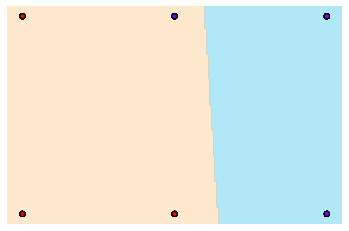

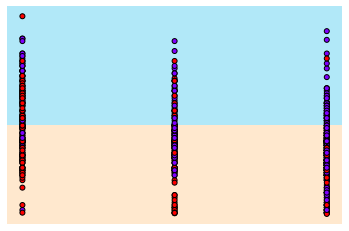

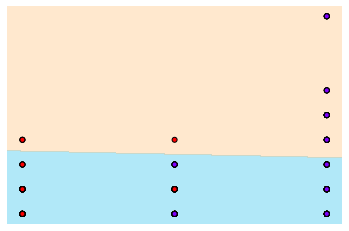

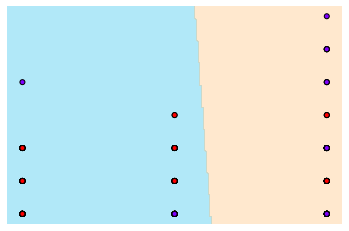

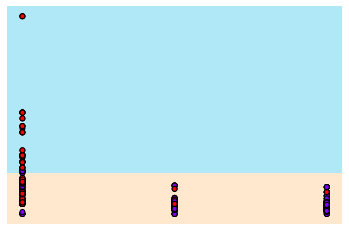

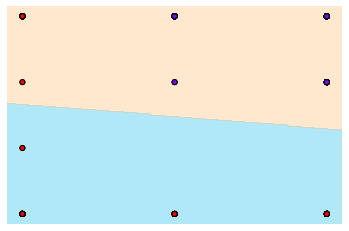

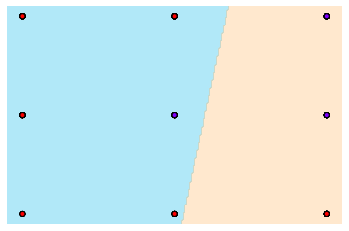

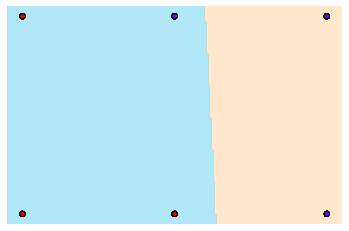

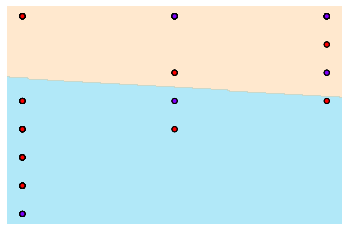

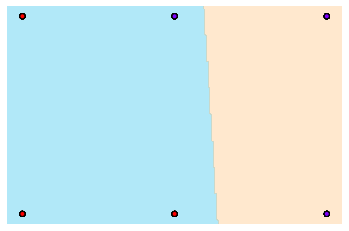

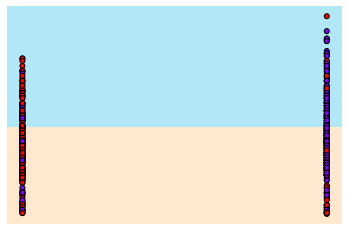

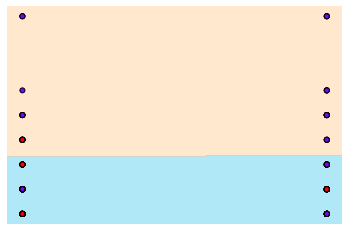

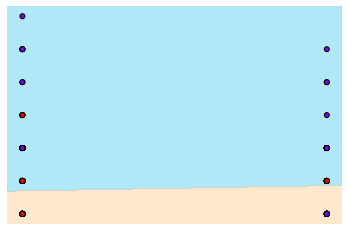

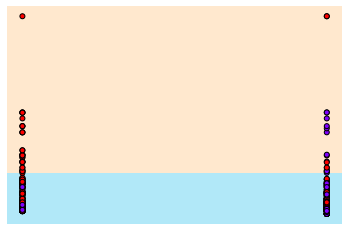

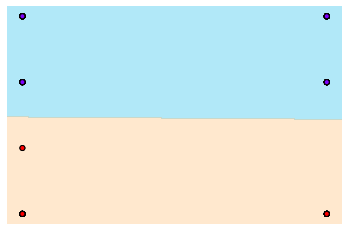

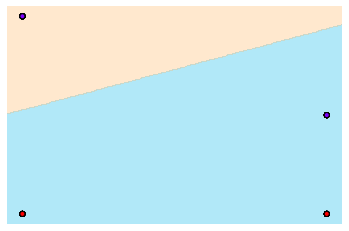

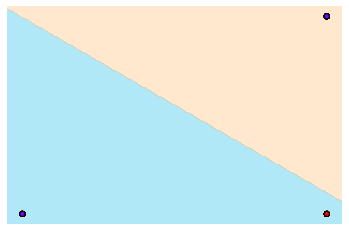

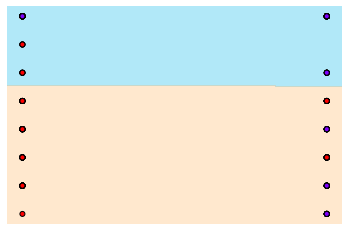

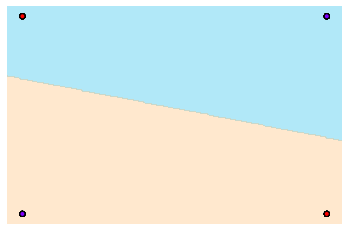

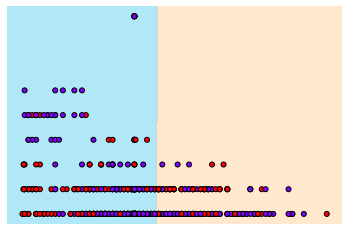

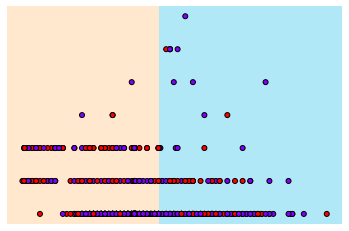

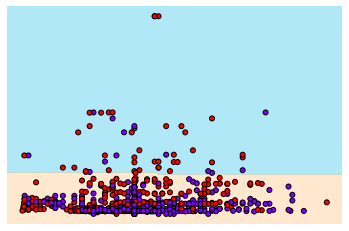

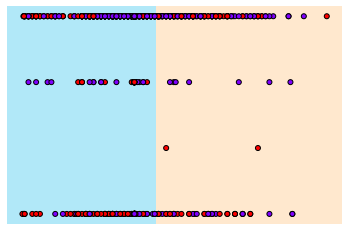

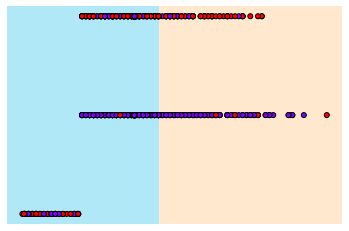

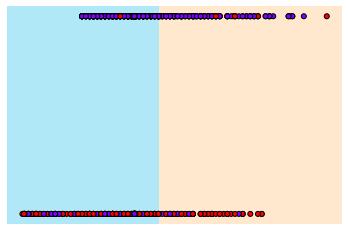

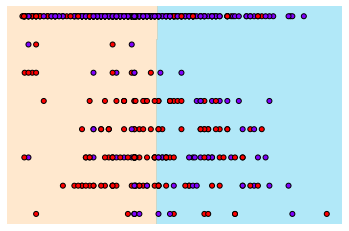

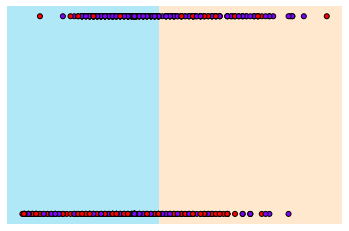

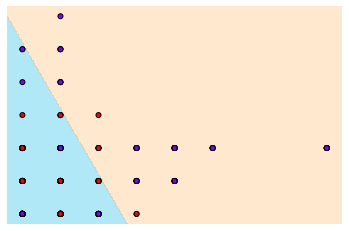

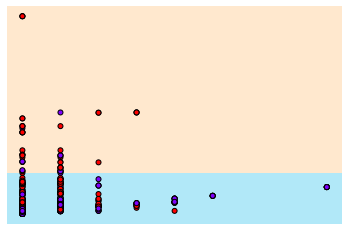

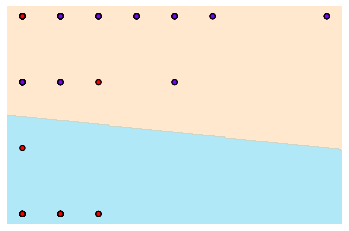

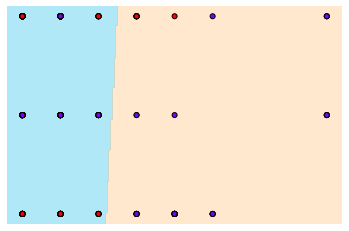

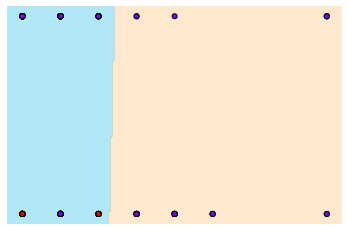

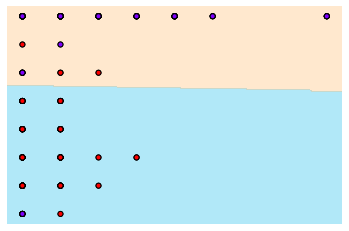

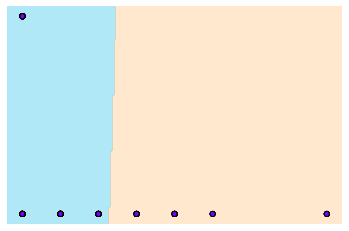

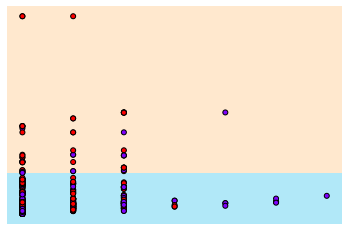

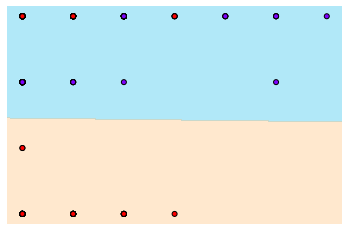

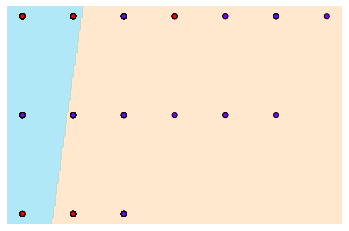

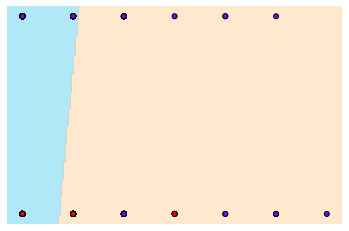

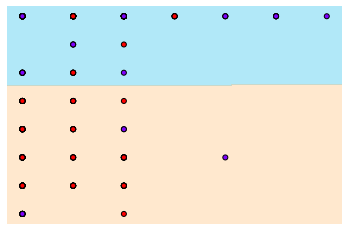

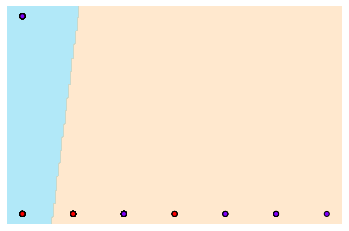

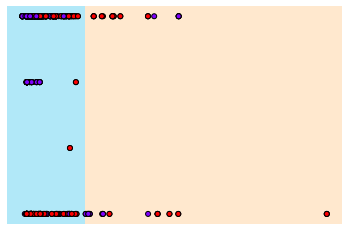

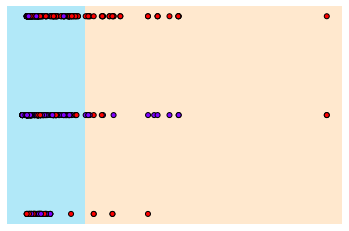

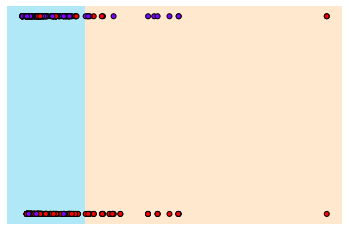

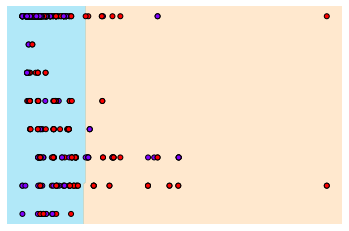

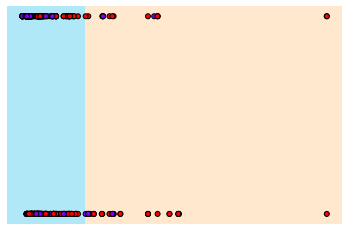

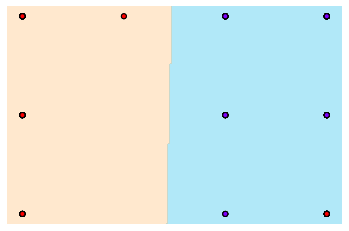

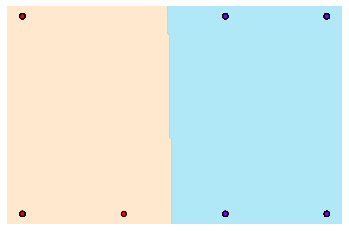

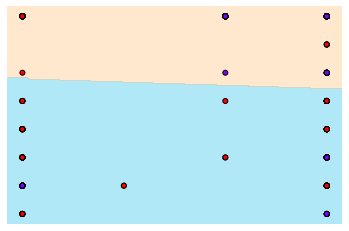

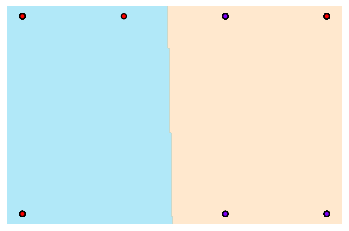

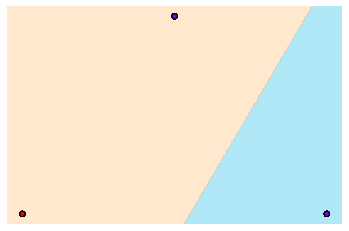

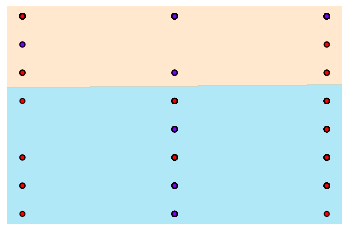

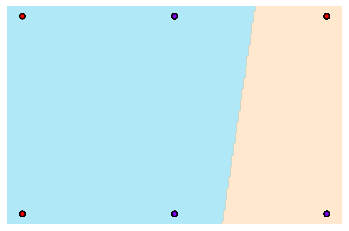

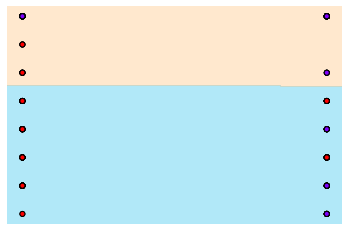

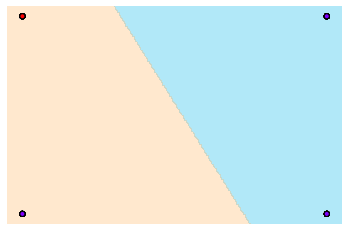

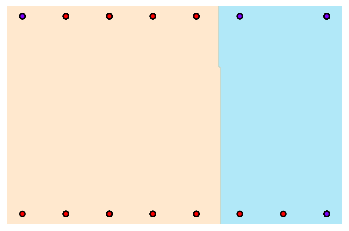

In [2]:
# 5. 인풋 피처를 2개씩 만들어서 실제로 어떻게 분리가 되고 있는 지 확인해본다.
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
             clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                         levels=np.arange(n_classes + 1) - 0.5,
                         cmap='rainbow', clim=(y.min(), y.max()), zorder=1)

features_list = []

for i in range(len(X.columns) - 1):
    for j in range(i + 1, len(X.columns)):
        features_list.append([i, j])
        
name_list = []

for feature in features_list:
    temp_list = []
    temp_list.append(list(X.columns)[feature[0]])
    temp_list.append(list(X.columns)[feature[1]])
    name_list.append(temp_list)
    
for name in name_list:
    k_mean = KMeans(n_clusters = 2, n_init=10).fit(X.loc[:, name])
    visualize_boundary(k_mean, X.loc[:, name], y) 

# 계층 군집화

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
titanic = sns.load_dataset("titanic")
titanic = titanic.drop(['embark_town', 'deck', 'class', 'who', 'alive'], axis = 1)
titanic.age.fillna(titanic.age.mean(), inplace = True)
titanic.embarked.fillna('N', inplace = True)

sex_item = list(set(titanic.sex))
encoder = LabelEncoder()
encoder.fit(sex_item)
sex_label = encoder.transform(titanic.sex)
titanic.sex = sex_label

embarked_item = list(set(titanic.embarked))
encoder = LabelEncoder()
encoder.fit(embarked_item)
embarked_label = encoder.transform(titanic.embarked)
titanic.embarked = embarked_label

titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   pclass      891 non-null    int64  
 2   sex         891 non-null    int32  
 3   age         891 non-null    float64
 4   sibsp       891 non-null    int64  
 5   parch       891 non-null    int64  
 6   fare        891 non-null    float64
 7   embarked    891 non-null    int32  
 8   adult_male  891 non-null    bool   
 9   alone       891 non-null    bool   
dtypes: bool(2), float64(2), int32(2), int64(4)
memory usage: 50.6 KB


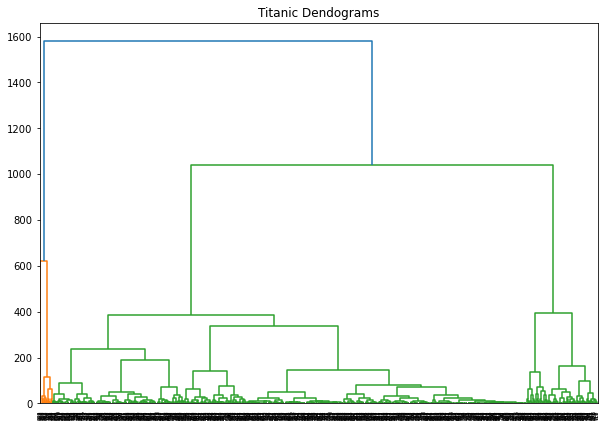

In [22]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Titanic Dendograms")
dend = shc.dendrogram(shc.linkage(titanic, method='ward'))

# 보스턴 선형예측

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [27]:
key_list = []
value_list = []

for key, value in load_boston().items():
    key_list.append(key)
    value_list.append(value)

key_list = key_list[:3]
value_list = value_list[:3]

In [30]:
dataset = pd.DataFrame(value_list[0], columns = value_list[2])
label = value_list[1]

In [32]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [33]:
label

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [37]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(dataset, label, test_size = 0.2, random_state=142)

In [42]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [44]:
from sklearn.metrics import mean_squared_error

Y_pred = model.predict(X_test)
print(mean_squared_error(Y_test, Y_pred))

20.65333057005882
